In [ ]:
!pip install yfinance
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

     |████████████████████████████████| 6.3 MB 13.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=f95ff2bc41101c4c09fd67563bb8a92330ce37ca42994822b979005d41c59292
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
Selecting previously unselected package libta-lib0.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2

In [ ]:
# Data Importer

import talib
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####################
startdate =  "2021-01-01"
enddate = "2021-08-04"
ticker = 'NIO'
####################
# df_stock_data=[]
frames=[]
list_tickers = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'FB', 'NIO', 'BABA', 'JD', 'CHPT', 'GOOG', 'AMD', 'FVRR']

stock_data = yf.download(ticker, start=startdate, end= enddate)
stock_data.insert(loc = 0, column='Ticker', value = ticker)


# for ticker in list_tickers:
#   stock_data = yf.download(ticker, start=startdate, end= enddate)
#   stock_data.insert(loc = 0, column='Ticker', value = ticker)
#   frames = stock_data.append(frames)

# df_stock_data = pd.concat([frames])
# df_stock_data
# plt.plot(stock_data['Close'], color='blue')
# plt.title("Daily Close Price")
# plt.show()
# stock_data = df_stock_data

[*********************100%***********************]  1 of 1 completed


In [ ]:
### Add Calcukate Indicators
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA_50'] = talib.SMA(stock_data['Close'], timeperiod=50)
stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)
stock_data['EMA_50'] = talib.EMA(stock_data['Close'], timeperiod=50)
stock_data['ADX'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14)
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)

macd, macdsignal, macdhist = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
upper, mid, lower = talib.BBANDS(stock_data['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)



stock_data.tail(50)


,Ticker,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,EMA_20,EMA_50,ADX,RSI
Date,,,,,,,,,,,,,
2021-05-24,NIO,34.259998,36.490002,33.560001,35.889999,35.889999,67244400,36.1645,38.0432,35.639424,39.205536,32.636581,48.503593
2021-05-25,NIO,36.320000,37.639999,35.689999,36.070000,36.070000,76628000,35.9075,37.8660,35.680432,39.082574,30.946729,49.125757
2021-05-26,NIO,36.250000,38.080002,36.070000,37.759998,37.759998,55929000,35.7360,37.7476,35.878486,39.030708,29.132553,54.663965
2021-05-27,NIO,37.950001,38.980000,37.180000,38.910000,38.910000,53064400,35.7320,37.6306,36.167201,39.025974,27.144207,58.013451
2021-05-28,NIO,38.740002,39.759998,38.169998,38.619999,38.619999,58236000,35.6710,37.5704,36.400801,39.010054,25.700216,56.872356
2021-06-01,NIO,39.990002,42.439999,39.939999,42.340000,42.340000,101544100,35.8110,37.5502,36.966439,39.140640,25.518388,66.087148
2021-06-02,NIO,42.150002,42.880001,40.950001,41.160000,41.160000,66383500,35.9725,37.5146,37.365826,39.219830,25.513686,61.591674
2021-06-03,NIO,40.680000,42.369999,40.310001,40.900002,40.900002,62437200,36.1320,37.5090,37.702414,39.285720,25.108360,60.613312
2021-06-04,NIO,41.430000,42.330002,41.150002,41.939999,41.939999,40993600,36.3950,37.6086,38.105993,39.389809,24.731986,63.135798


NIO CHARTS:


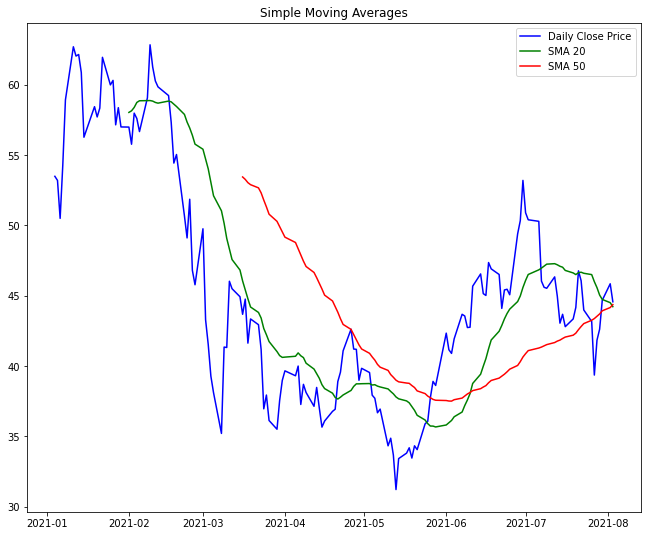

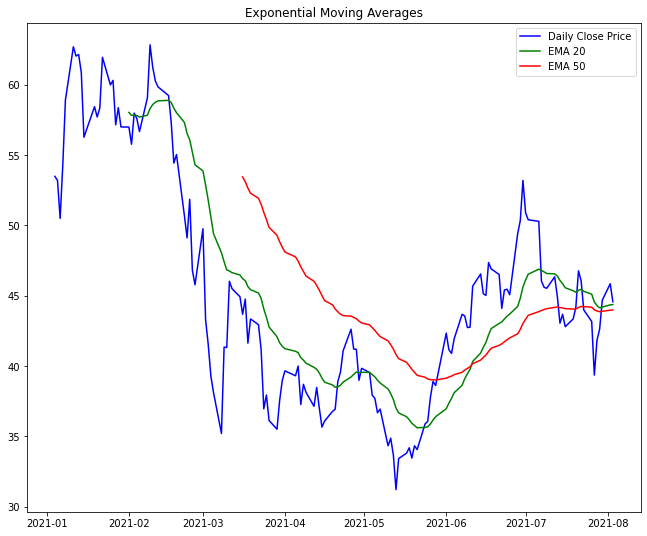

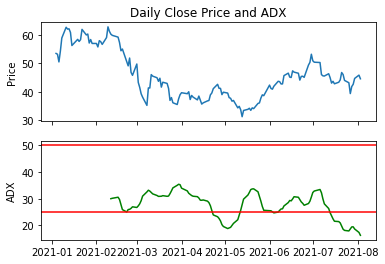

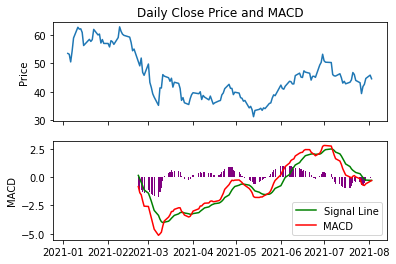

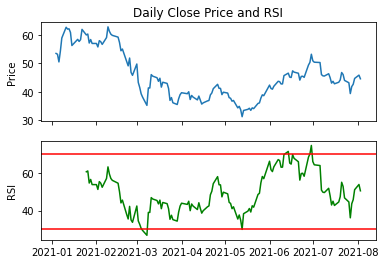

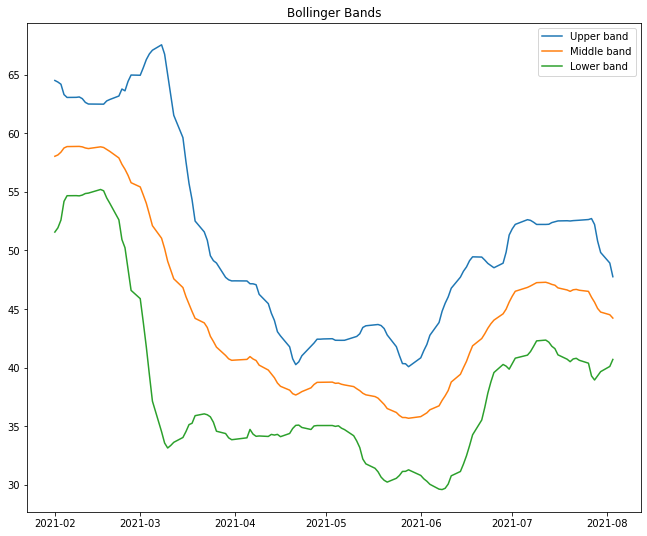

In [ ]:
print(ticker, "CHARTS:")


### SMA CHART
plt.subplots(figsize=(11, 9))

plt.plot(stock_data['Close'], color='blue', label='Daily Close Price')
plt.plot(stock_data['SMA_20'], color='green', label='SMA 20')
plt.plot(stock_data['SMA_50'], color='red', label='SMA 50')
stock_data
plt.legend()
plt.title('Simple Moving Averages')
plt.show()

### EMA CHART
plt.subplots(figsize=(11, 9))

plt.plot(stock_data['Close'], color='blue', label='Daily Close Price')
plt.plot(stock_data['EMA_20'], color='green', label='EMA 20')
plt.plot(stock_data['EMA_50'], color='red', label='EMA 50')
plt.legend()
plt.title('Exponential Moving Averages')
plt.show()

### ADX CHART
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('ADX')
ax2.plot(stock_data['ADX'], color='green')
ax1.set_title('Daily Close Price and ADX')
ax2.axhline(y = 50, color = 'r', linestyle = '-')
ax2.axhline(y = 25, color = 'r', linestyle = '-')
plt.show()

### MACD CHART

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('MACD')
ax2.plot(macdsignal, color='green', label='Signal Line')
ax2.plot(macd, color='red', label='MACD')
ax2.bar(macdhist.index, macdhist, color='purple')
ax1.set_title('Daily Close Price and MACD')
plt.legend()
plt.show()


### RSI CHART
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('RSI')
ax2.plot(stock_data['RSI'], color='green')
ax2.axhline(y = 70, color = 'r', linestyle = '-')
ax2.axhline(y = 30, color = 'r', linestyle = '-')
ax1.set_title('Daily Close Price and RSI')
plt.show()

### Bollinger Bands CHART
plt.subplots(figsize=(11, 9))
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [ ]:
stock_data[stock_data['RSI']<30]
stock_data.query('Ticker == "FVRR" and Date >"2019-07-03"').head(50)

,Ticker,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,EMA_20,EMA_50,ADX,RSI
Date,,,,,,,,,,,,,
